# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.




-----

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline




## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [ ]:
data = pd.read_csv('airquality.csv')
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [ ]:
data.describe().round(2)

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.00,146.00,153.00,153.00,153.00,153.00
mean,42.13,185.93,9.96,77.88,6.99,15.80
std,32.99,90.06,3.52,9.47,1.42,8.86
min,1.00,7.00,1.70,56.00,5.00,1.00
25%,18.00,115.75,7.40,72.00,6.00,8.00
50%,31.50,205.00,9.70,79.00,7.00,16.00
75%,63.25,258.75,11.50,85.00,8.00,23.00
max,168.00,334.00,20.70,97.00,9.00,31.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:**
Можно заметить, что данные несильно отличаются друг от друга. Это может говорить о том, что в данных нет явных выбросов. 


Но нельзя это утвердать, так как выбросы могут быть спрятаны или их малое количество. Поэтому для их выявления нужны другие методы.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

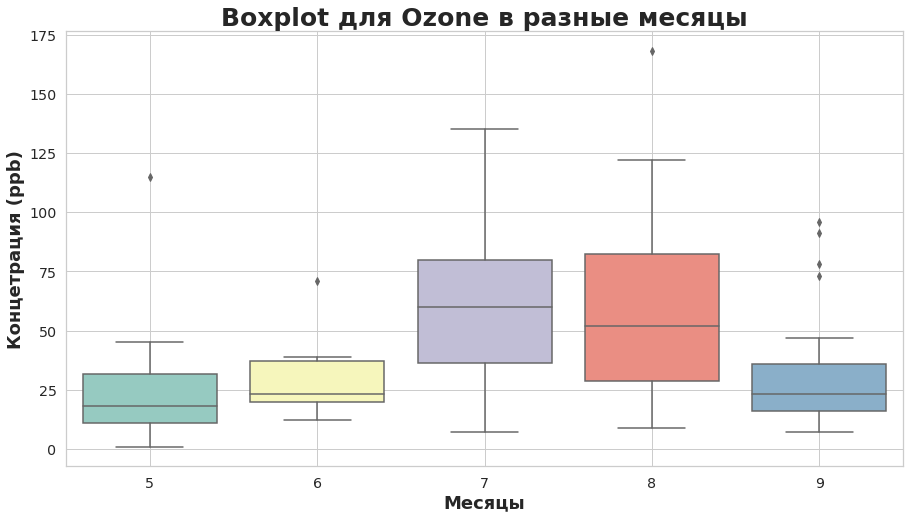

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=data['Month'], y=data['Ozone'], palette='Set3', ax=ax )

sns.set_style("whitegrid")

ax.set_title('Boxplot для Ozone в разные месяцы', fontsize=25, fontweight='bold')
ax.set_xlabel('Месяцы', fontsize=18, fontweight='bold')
ax.set_ylabel('Концетрация (ppb)', fontsize=18, fontweight='bold')

ax.grid(True)

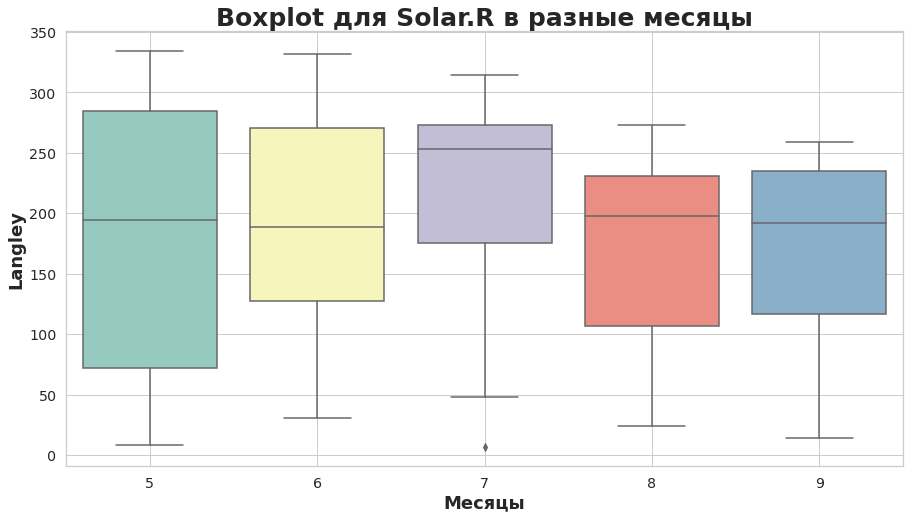

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=data['Month'], y=data['Solar.R'], palette='Set3', ax=ax )

ax.set_title('Boxplot для Solar.R в разные месяцы', fontsize=25, fontweight='bold')
ax.set_xlabel('Месяцы', fontsize=18, fontweight='bold')
ax.set_ylabel('Langley', fontsize=18, fontweight='bold') #единица измерения

sns.set_style("whitegrid")

ax.grid(True)

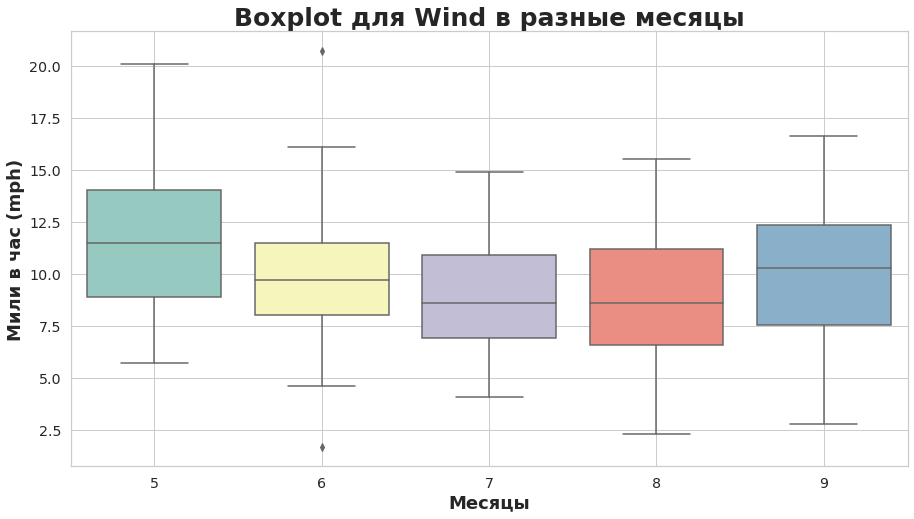

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=data['Month'], y=data['Wind'], palette='Set3', ax=ax )

ax.set_title('Boxplot для Wind в разные месяцы', fontsize=25, fontweight='bold')
ax.set_xlabel('Месяцы', fontsize=18, fontweight='bold')
ax.set_ylabel('Мили в час (mph)', fontsize=18, fontweight='bold')

sns.set_style("whitegrid")

ax.grid(True)

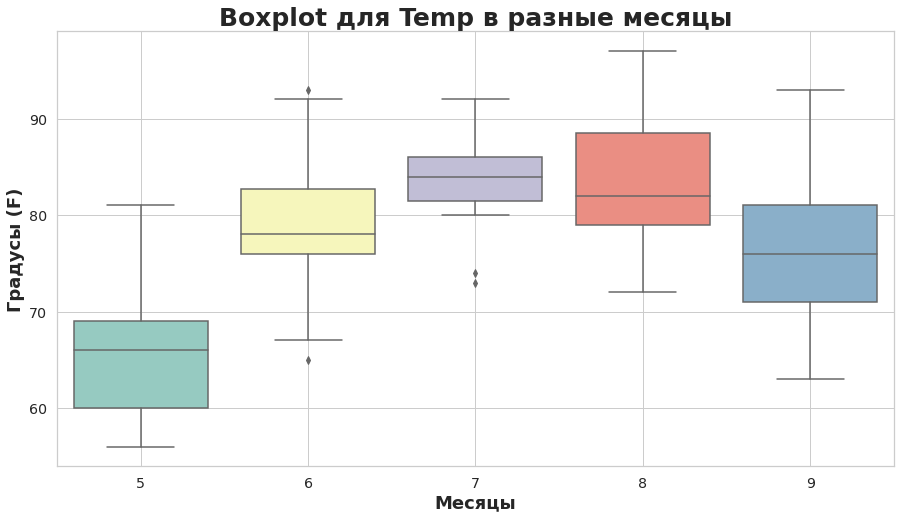

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=data['Month'], y=data['Temp'], palette='Set3', ax=ax )

ax.set_title('Boxplot для Temp в разные месяцы', fontsize=25, fontweight='bold')
ax.set_xlabel('Месяцы', fontsize=18, fontweight='bold')
ax.set_ylabel('Градусы (F)', fontsize=18, fontweight='bold')

sns.set_style("whitegrid")

ax.grid(True)

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**
Boxplot представляет собой прямоугольник(яшик), горизонтальные/вертикальные линии(усы) и точки(выбросы). 

1)Первая граница ящика- 1й квартиль(25-й процентиль), вторая граница-3 квартиль(75-й процентиль). 

2)Между границами ящиков есть еще одна линия- это медиана(50-й процентиль). 

3)Выбросы - это точки, которые находятся за пределами усов.


Проанализировав графики, можно прийти к следующим выводам:

1) Концентрация озона высока в летние месяцы, максимум достигается в июле. После наблюдаем спад концетрации. Возможно, по этой причине больше всего выбросов в сентябре

2)Значения интенсивности солнечного излучения с мая по июль были наибольшими, то есть эти месяцы были более солнечные, чем август и сентябрь. Однако, в июле есть небольшое количество выбросов, что говорит, что были туманные дни.


3)Значения скорости ветра минимальны в июль-август, максимальны в мае. Это может указывать на то, что в мае дни еще ветренные, а в июле-августе меньше ветра. Также в июне-июле есть выбросы, которые могут значить, что были более ветренные или безветренные дни.

4)Значения температуры, как можно было предположить, выше в летние месяцы(июнь-август). Однако в июне-июле есть выбросы, которые говорят, что были прохладные дни. Возможно, если провести параллель с анализом по скорости ветра, это могут быть те же дни, в которые наблюдался более сильный ветер. 






Boxplot позволяет наглядно представить распределение данных по квартилям, в том числе по медиане, и выбросам.


**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

Проанализировав графики сверху, можно заметить, что больше всего выбросов по параметру Ozone. Рассчитаем выборочное среденее и и выборочную медиану.

In [ ]:
parameter = data['Ozone']
parameter = parameter.dropna()

mean = parameter.mean().round(3)
mediana = parameter.median()

mean, mediana

(42.129, 31.5)

Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Значения различаются, что говорит о наличии существенных выбросов, которые влияют на среднее, но не на значение медианы.


Медиана более устойчивая к выбросам, так как она делит упорядоченную выборку на две части, получается меньше зависит от далеко стоящих значений.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** Точно утверждать не можем, так как не знаем каким образом и в каких условиях были собраны данные.


Если собраны специфически, то утверждать о независимости нельзя, так как они становятся зависимыми.  Если условия собраны случайным образом, то независимость выполняется.

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:** Мне кажется, что независимость часто нарушается.
Возможно,  это проверить можно с помощью коэффициента корреляции(или какого-нибудь метода, связанного с корреляцией).

Нарушение независимости, может привести к некорректным выводам и результатам при анализе.

Количественная мера-коэффициент корреляции.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:** Метод визуального анализа - это способ быстро провести анализ данных: выявить выбросы, медиану, распредление  и тд. Это поможет в дальшей работе с данными.

Робастные статистики- это показатели, которые устойчивы к выбросам. Они важны при анализе данных, так как почти всегда есть выбросы, которые могут направить на неправильный вывод.

Мне кажется, что в реальном мире мало независимых одинаково распределённых случайных величин. Так как в данных всегда есть выбросы, которые нарушают одинаковость распределение и независимость. Нужно при работе с данными выявлять выбросы и стараться брать такие диапозоны, в которых их нет. Тогда будет корректный анализ.

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

In [ ]:
wine = pd.read_csv('wine.data', names=['type', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13'])
wine.head()

,type,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Узнаем сколько всего в данных вин первого типа. Для этого посчитаем количество вин по уникальным значениям.

In [ ]:
types, counts = wine['type'].unique(), wine['type'].value_counts()
types, counts

(array([1, 2, 3]), 2    71
 1    59
 3    48
 Name: type, dtype: int64)

Получаем, что вин первого типа 59.




Создадим новый DataFrame, где будут вина только первого типа и нужные нам 4 столбца:

In [ ]:
columns = ['col4', 'col8', 'col9', 'col11']
wine_1 = wine[wine['type'] == 1][['col4', 'col8', 'col9', 'col11']]
wine_1.tail()




,col4,col8,col9,col11
54,16.4,0.21,1.62,0.92
55,20.5,0.20,2.45,0.98
56,16.3,0.26,2.03,0.94
57,16.8,0.31,1.66,1.07
58,16.7,0.19,2.04,0.89


Посчитаем выборочное среднее и стандартное отклонение. Будем использовать уровень доверия 95%:

In [ ]:
mean = wine_1.mean()
std = wine_1.std()
alpha = 0.05

z = sps.norm.ppf((1 + alpha) / 2)
as_table = pd.DataFrame({
   'high_as': mean + z * std / np.sqrt(len(wine_1)),
   'low_as' : mean - z * std / np.sqrt(len(wine_1))
})
as_table

,high_as,low_as
col4,17.058076,17.016501
col8,0.290572,0.289428
col9,1.902686,1.895958
col11,1.062985,1.061083


In [ ]:
wine_1 = wine_1.dropna(axis=0)
mean = wine_1.mean()
std = wine_1.std()
alpha = 0.05 
n = len(wine_1)


t = sps.t.ppf((1 + alpha) / 2, n-1)
ex_tabel = pd.DataFrame({
    'high_ex': mean - t * std / np.sqrt(n - 1),
    'low_ex': mean + t * std / np.sqrt(n - 1)
})
ex_tabel 
  
  

,high_ex,low_ex
col4,17.016231,17.058345
col8,0.289421,0.290579
col9,1.895914,1.902730
col11,1.061071,1.062997


Сделайте выводы по полученной таблице.

**Вывод:**
Можно заметить, что данные полученные данные почти не отличаются друг от друга. Значит, выборка достаточного размера, так как если выборка мала, то АДИ может быть не точен. Также это значит, что распределение средних близко к нормальному распределению.

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

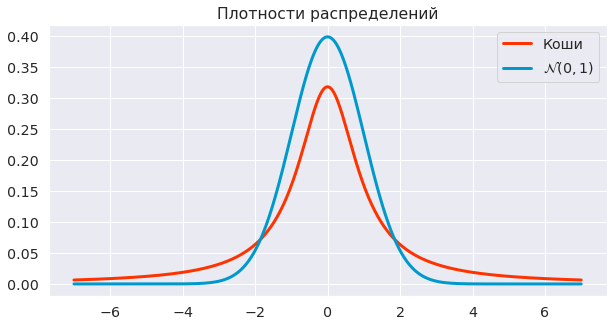

In [ ]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [ ]:
count = 10**5
size = 30 
norm_arr = sps.norm.rvs(size = (count, size))

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

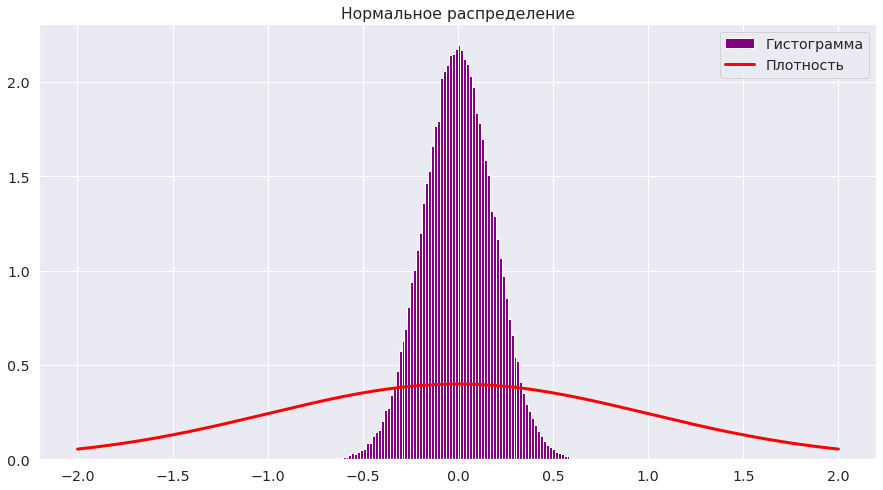

In [ ]:
mean = []
for i in range(count):
  mean.append(norm_arr[i].mean())

plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
plt.hist(mean, color='purple', bins=100, label='Гистограмма', density=True)

grid = np.linspace(-2, 2, 1000)
pdf = sps.norm.pdf(grid)
plt.plot(grid, pdf, color='red', label='Плотность', lw=3)
plt.legend()
plt.title('Нормальное распределение');

**Вывод:**
Можно сделать вывод о том, что при большом числе выборок выборочные средние значения норального распределения имеют распределение, близкое к нормальному по ЦПТ.
Из-за этого гистограмма имеет форму колокола.


Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [ ]:
count = 10**5
size = 30 
cauchy_arr = sps.cauchy.rvs(size=(count, size))
cauchy_arr.shape

(100000, 30)

Построим аналогичный график. 

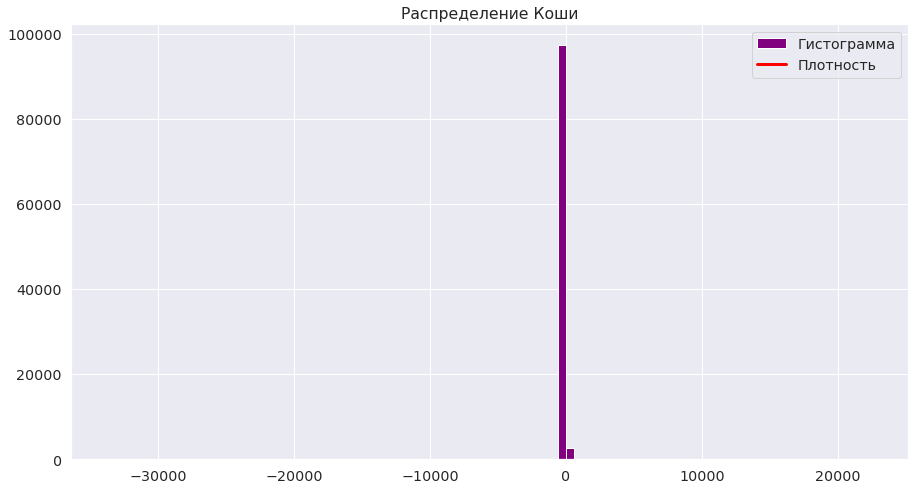

In [ ]:
mean_c = []
for i in range(count):
  mean_c.append(cauchy_arr[i].mean())
  
sns.set_style("darkgrid")

plt.figure(figsize=(15,8))
plt.hist(mean_c, color='purple', bins=100, label='Гистограмма')

grid = np.linspace(-10, 10, 1000)
pdf = sps.cauchy.pdf(grid)
plt.plot(grid, pdf, color='red', label='Плотность', lw=3)
plt.legend()
plt.title('Распределение Коши')


plt.show();

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**
Такой график получается, скорее всего, по причине того, что у распределения Коши есть "тяжелые" хвосты, из-за которых выборочные средние очень большие.


Выборочные средние (по норм.распр-ю) имеют распределение близкое к нормальному, для низ выполняется ЦПТ.
В отличие от выборочных средних распределения Коши. Из-за наличия тяжелых хвостов данный график имеет ярко выраженный большой пик.


## Задача 4



Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

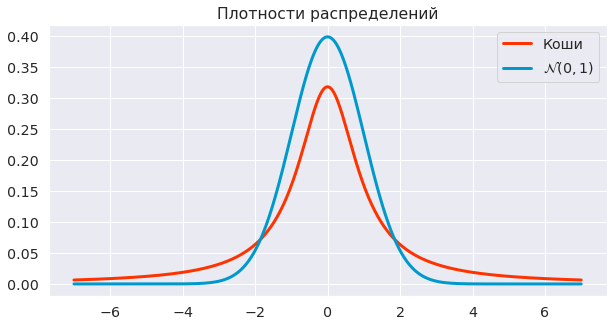

In [ ]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend(); #из задания 3.1

**Вывод:** У распределения Коши медленнве убывает и имеет более тяжелве хвосты